In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
ticker = 'FB'
time = '1m'
intervals = '1d'
data = yf.download(tickers=ticker, peroid = time, interval = intervals)

[*********************100%***********************]  1 of 1 completed


In [4]:
data['20MA'] = data['Adj Close'].rolling(20).mean().dropna()

In [5]:
data.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

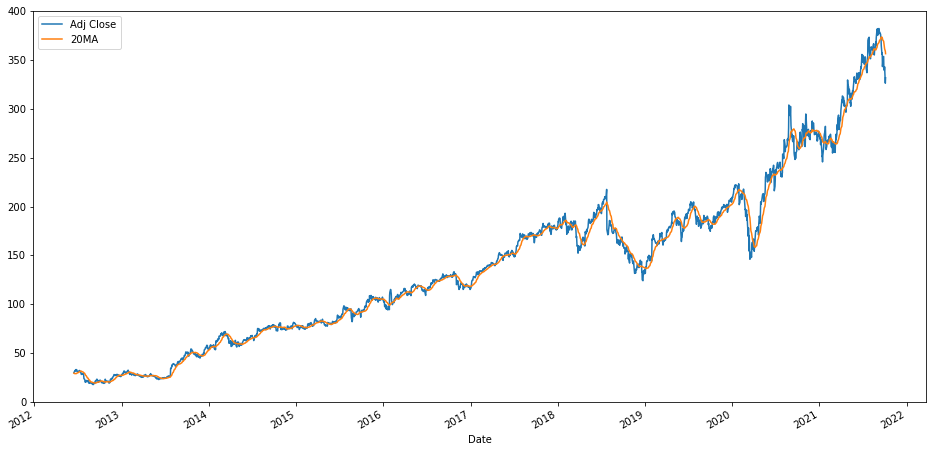

In [6]:
data[['Adj Close', '20MA']].plot(figsize=(16,8))

In [7]:
data['Upper'] = data['20MA'] + 2*data['20MA'].rolling(window=20).std()
data['Lower'] = data['20MA'] - 2*data['20MA'].rolling(window=20).std()
data

,Open,High,Low,Close,Adj Close,Volume,20MA,Upper,Lower
Date,,,,,,,,,
2012-06-15,28.510000,30.100000,28.350000,30.010000,30.010000,43563800,29.376000,NaN,NaN
2012-06-18,29.959999,32.080002,29.410000,31.410000,31.410000,42978900,29.035000,NaN,NaN
2012-06-19,31.540001,32.180000,30.700001,31.910000,31.910000,30849000,28.929000,NaN,NaN
2012-06-20,31.920000,31.930000,31.150000,31.600000,31.600000,15553600,28.959000,NaN,NaN
2012-06-21,31.670000,32.500000,31.510000,31.840000,31.840000,21875300,28.951000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-09-29,343.149994,345.230011,338.880005,339.609985,339.609985,14452200,365.195999,370.604459,359.787539
2021-09-30,340.450012,342.799988,338.149994,339.390015,339.390015,16547100,363.063000,368.931064,357.194937
2021-10-01,341.609985,345.019989,338.640015,343.010010,343.010010,14905300,361.449501,368.185188,354.713814


<AxesSubplot:xlabel='Date'>

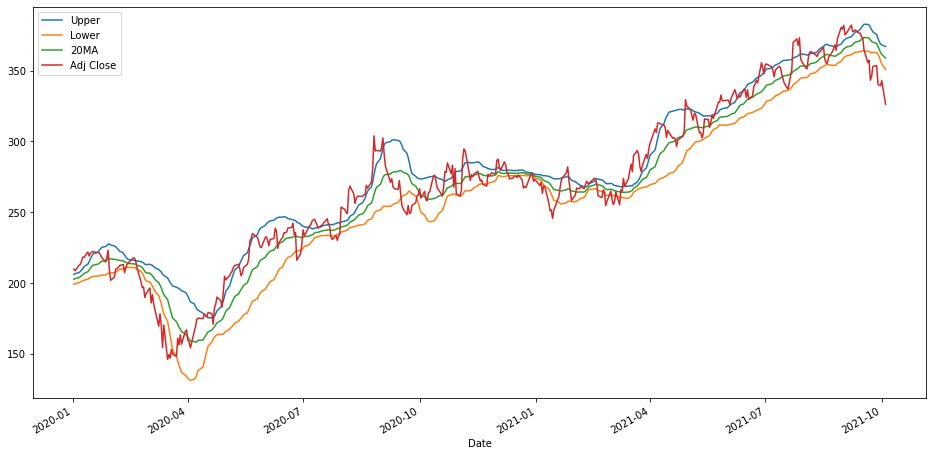

In [8]:
data.loc['2020-01-01':'2021-10-04'][['Upper','Lower','20MA','Adj Close']].plot(figsize=(16,8))


<AxesSubplot:xlabel='Date'>

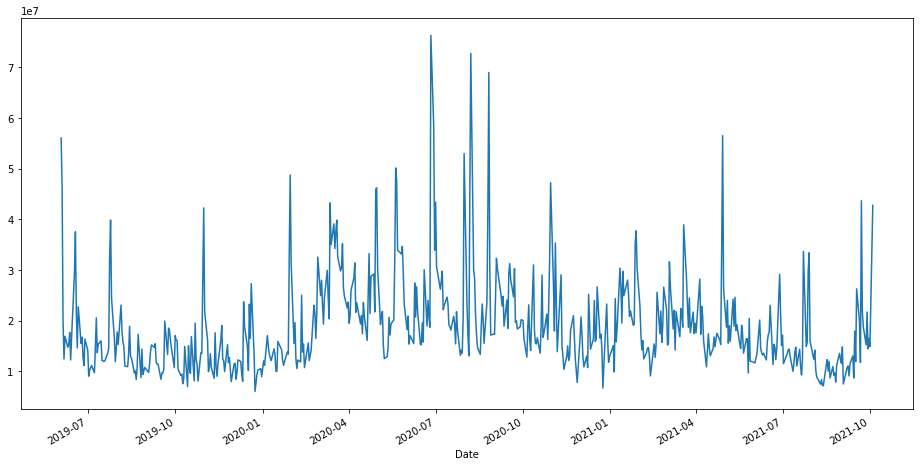

In [9]:

data.loc['2019-06-01':'2021-10-04']['Volume'].plot(figsize=(16,8))

In [10]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,20MA,Upper,Lower
Date,,,,,,,,,
2021-09-29,343.149994,345.230011,338.880005,339.609985,339.609985,14452200,365.195999,370.604459,359.787539
2021-09-30,340.450012,342.799988,338.149994,339.390015,339.390015,16547100,363.063000,368.931064,357.194937
2021-10-01,341.609985,345.019989,338.640015,343.010010,343.010010,14905300,361.449501,368.185188,354.713814
2021-10-04,335.529999,335.940002,322.700012,326.230011,326.230011,42772900,358.948001,367.071051,350.824951
2021-10-05,328.579987,333.544403,326.163788,331.779999,331.779999,16346328,356.428001,366.301986,346.554017


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
decomposition = seasonal_decompose(data['Adj Close'],freq=12)

/var/folders/73/vmbdk0556z3cwwdgnygnh5qh0000gn/T/ipykernel_57136/3797898784.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(data['Adj Close'],freq=12)


<Figure size 432x288 with 0 Axes>

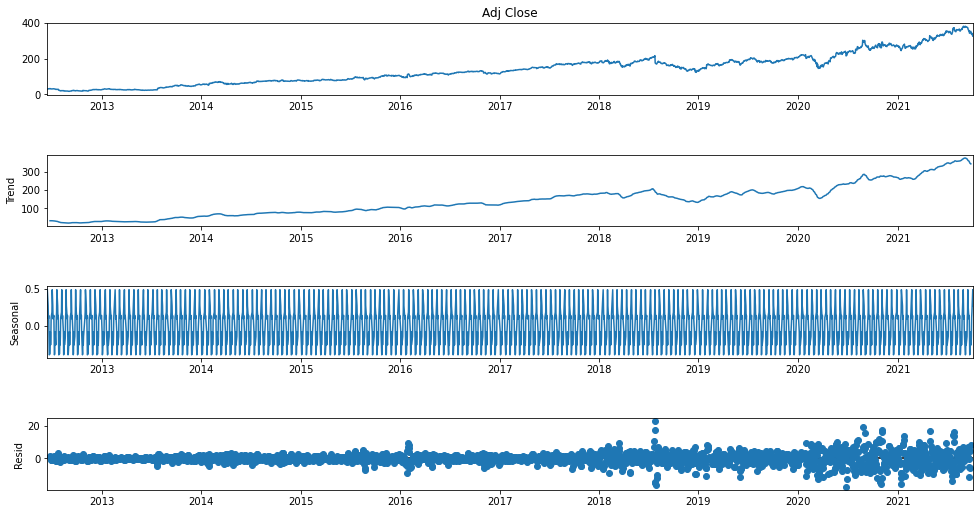

In [25]:
fig= plt.figure()
fig= decomposition.plot()
fig.set_size_inches(15,8)

In [45]:
from statsmodels.tsa.stattools import adfuller

In [62]:
ad_result = adfuller(data['Adj Close'])

In [99]:
def adf_check(time_series):
    print("Augmented Dickey-Fuller Test:")
    result = adfuller(time_series)
    labels = ['ADF Test Statistic', 'p-value', '#lags used','#obvs used']
    for value,label in zip(result,labels):
        print(label+ " : "+ str(value))
    if ad_result[1]<= 0.05:
        print("Strong evidence against the null hypothesis. REJECT! Data is stationary")
    else:
        print("Weak evidence against the null hypothesis. Indicates data is non-stationary. p-value > 0.05")
    

In [100]:
data['Adj Close First Difference'] = data['Adj Close'] - data['Adj Close'].shift(1)
data['Adj Close First Difference']

Date
2012-06-15          NaN
2012-06-18     1.400000
2012-06-19     0.500000
2012-06-20    -0.309999
2012-06-21     0.240000
                ...    
2021-09-29    -1.040009
2021-09-30    -0.219971
2021-10-01     3.619995
2021-10-04   -16.779999
2021-10-05     5.549988
Name: Adj Close First Difference, Length: 2342, dtype: float64

In [101]:
data['Adj Close First Difference'].dropna(inplace=True)
adf_check(data['Adj Close'])


Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.1433006084926284
p-value : 0.9688960726494197
#lags used : 24
#obvs used : 2317
Weak evidence against the null hypothesis. Indicates data is non-stationary. p-value > 0.05


In [102]:
adf_check(data['Adj Close First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.316091437494928
p-value : 1.0182568457681782e-15
#lags used : 23
#obvs used : 2317
Weak evidence against the null hypothesis. Indicates data is non-stationary. p-value > 0.05


/var/folders/73/vmbdk0556z3cwwdgnygnh5qh0000gn/T/ipykernel_57136/2397392712.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(data['Adj Close First Difference'].dropna(),freq=12)


<Figure size 432x288 with 0 Axes>

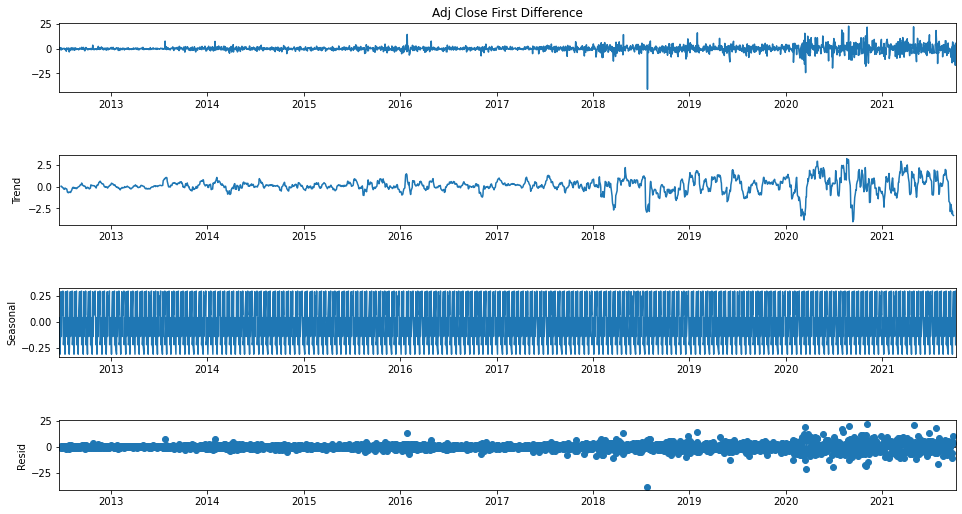

In [103]:
decomposition = seasonal_decompose(data['Adj Close First Difference'].dropna(),freq=12)
fig= plt.figure()
fig= decomposition.plot()
fig.set_size_inches(15,8)